<a href="https://colab.research.google.com/github/Hari-1718/ANN-Hackthon04/blob/main/Air_Quality_Alert_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split


In [ ]:
# Data Loading and Pre-processing

In [ ]:
data = pd.read_csv("/content/city_day.csv")
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
data.shape

(29531, 16)

In [ ]:
len(data)

29531

In [ ]:
#Data Cleaning

In [ ]:
data_na = list(data.isnull().sum())
data.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [159]:
for i in range(len(data_na)):
  print(len(data)-data_na[i])

29531
29531
24933
18391
25949
25946
25346
19203
27472
25677
25509
23908
21490
11422
24850
24850


In [ ]:
data_new = data.dropna()

In [ ]:
print("original data", len(data))
print("data after elimination", len(data_new))
print("Difference", len(data)-len(data_new))

original data 29531
data after elimination 6236
Difference 23295


In [ ]:
#Feature Selection

In [ ]:
  no2 = data_new.iloc[0:35949,3:4].values
  o3_1hr = data_new.iloc[0:35949,4:5].values
  o3_4hr = data_new.iloc[0:35949,5:6].values
  co = data_new.iloc[0:35949,6:7].values
  pm10 = data_new.iloc[0:35949,7:8].values
  pm25 = data_new.iloc[0:35949,8:9].values
  aqi_co = data_new.iloc[0:35949,9:10].values
  aqi_no2 = data_new.iloc[0:35949,10:11].values
  aqi_o3_1hr = data_new.iloc[0:35949,11:12].values
  aqi_o3_4hr = data_new.iloc[0:35949,12:13].values
  aqi_pm10 = data_new.iloc[0:35949,13:14].values
  aqi_pm25 = data_new.iloc[0:35949,14:15].values
  aqi_site = data_new.iloc[0:35949,15:16].values






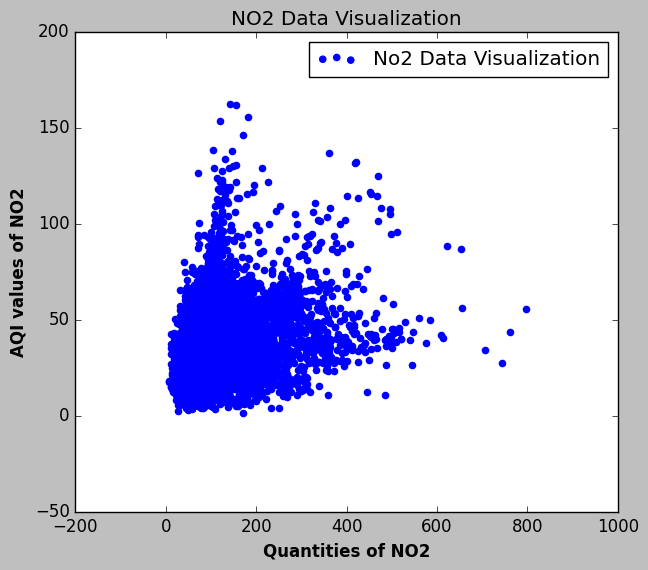

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(no2, aqi_no2, label="No2 Data Visualization", color="blue")
plt.xlabel("Quantities of NO2", weight="bold")
plt.ylabel("AQI values of NO2", weight="bold")
plt.title("NO2 Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('No2_data_visualization.jpg')






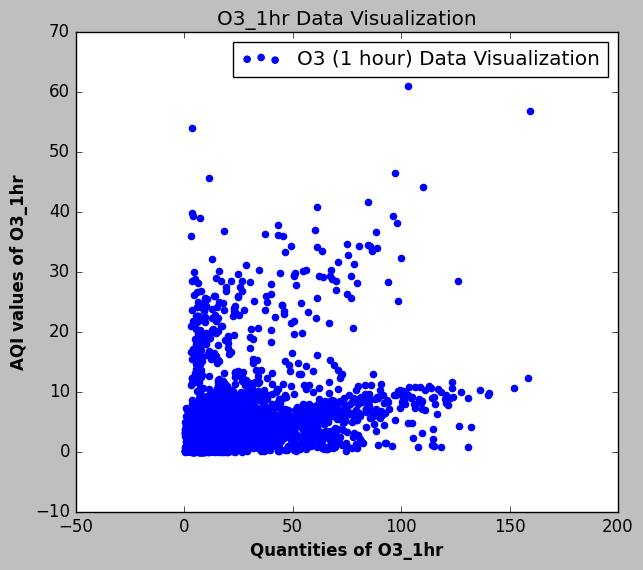

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(o3_1hr, aqi_o3_1hr, label="O3 (1 hour) Data Visualization", color="blue")
plt.xlabel("Quantities of O3_1hr", weight="bold")
plt.ylabel("AQI values of O3_1hr", weight="bold")
plt.title("O3_1hr Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('o3_1hr_data_visualization.jpg')

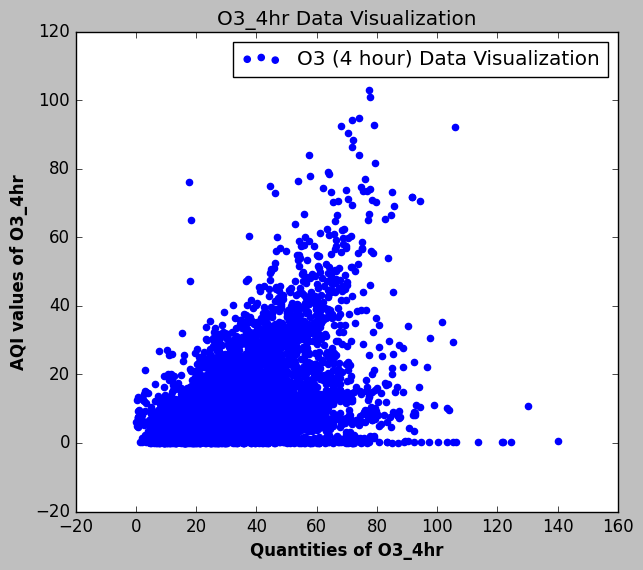

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(o3_4hr, aqi_o3_4hr, label="O3 (4 hour) Data Visualization", color="blue")
plt.xlabel("Quantities of O3_4hr", weight="bold")
plt.ylabel("AQI values of O3_4hr", weight="bold")
plt.title("O3_4hr Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('o3_4hr_data_visualization.jpg')

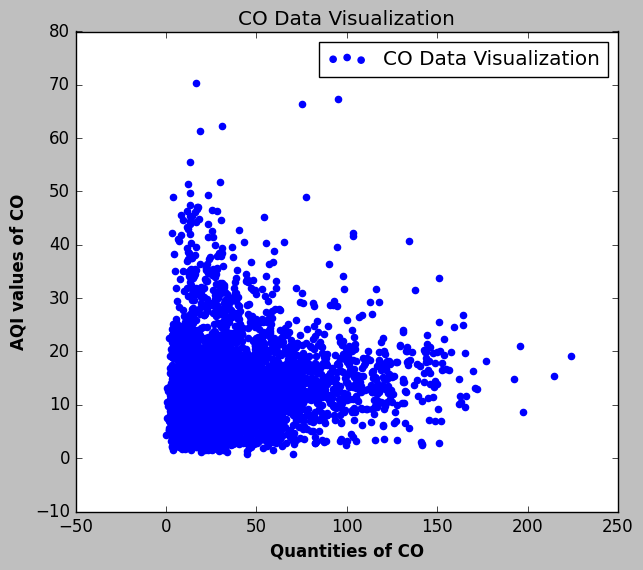

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(co, aqi_co, label="CO Data Visualization", color="blue")
plt.xlabel("Quantities of CO", weight="bold")
plt.ylabel("AQI values of CO", weight="bold")
plt.title("CO Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('CO_data_visualization.jpg')

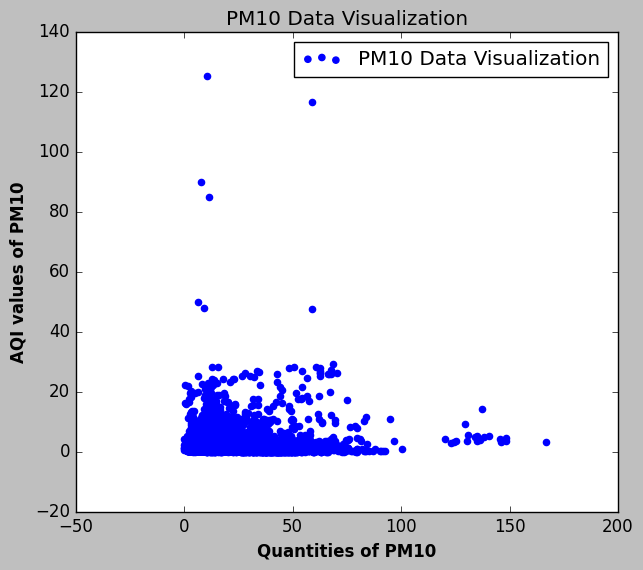

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm10, aqi_pm10, label="PM10 Data Visualization", color="blue")
plt.xlabel("Quantities of PM10", weight="bold")
plt.ylabel("AQI values of PM10", weight="bold")
plt.title("PM10 Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('pm10_data_visualization.jpg')

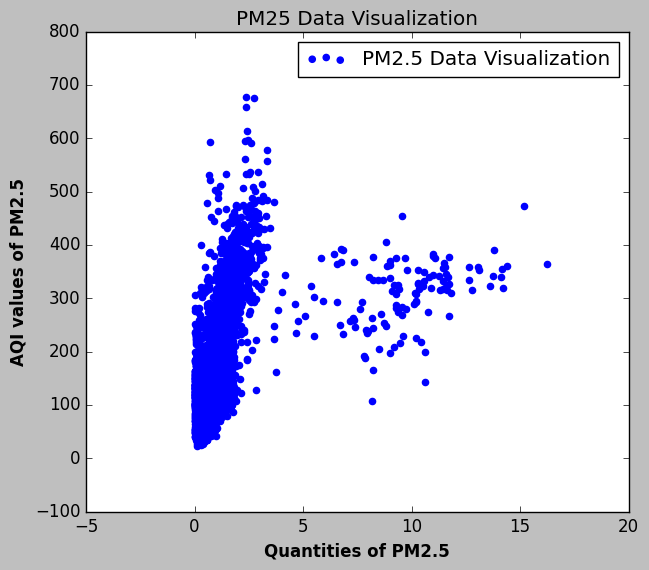

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm25, aqi_pm25, label="PM2.5 Data Visualization", color="blue")
plt.xlabel("Quantities of PM2.5", weight="bold")
plt.ylabel("AQI values of PM2.5", weight="bold")
plt.title("PM25 Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('pm25_data_visualization.jpg')

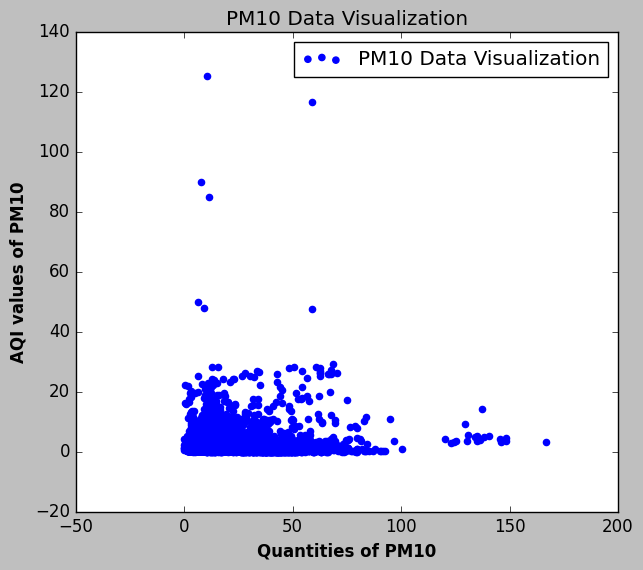

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm10, aqi_pm10, label="PM10 Data Visualization", color="blue")
plt.xlabel("Quantities of PM10", weight="bold")
plt.ylabel("AQI values of PM10", weight="bold")
plt.title("PM10 Data Visualization")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('pm10_data_visualization.jpg')

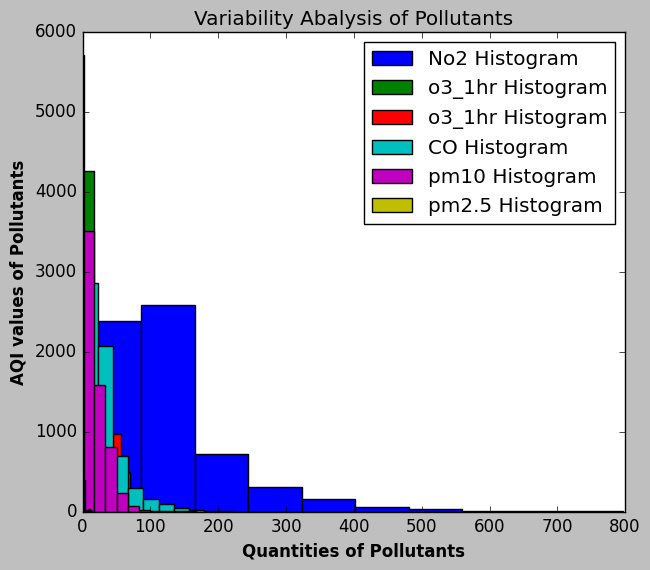

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.hist(no2, label="No2 Histogram")
plt.hist(o3_1hr, label="o3_1hr Histogram")
plt.hist(o3_4hr, label="o3_1hr Histogram")
plt.hist(co, label="CO Histogram")
plt.hist(pm10, label="pm10 Histogram")
plt.hist(pm25, label="pm2.5 Histogram")
plt.xlabel("Quantities of Pollutants", weight="bold")
plt.ylabel("AQI values of Pollutants", weight="bold")
plt.title("Variability Abalysis of Pollutants")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('data_visualization.jpg')

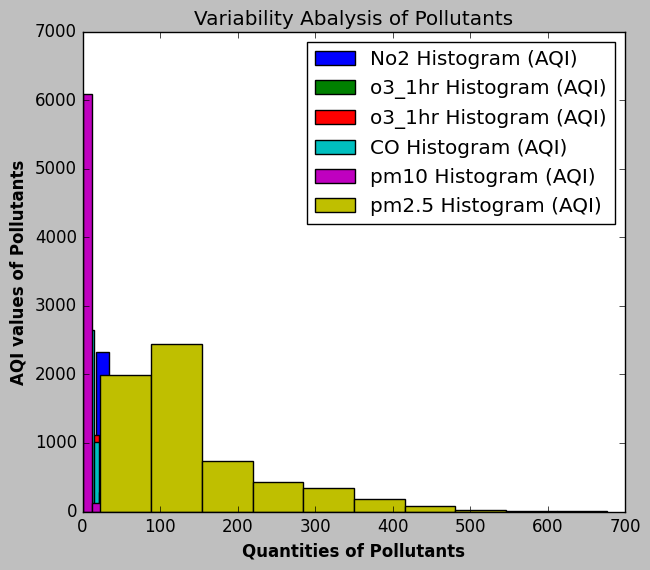

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.hist(aqi_no2, label="No2 Histogram (AQI)")
plt.hist(aqi_o3_1hr, label="o3_1hr Histogram (AQI)")
plt.hist(aqi_o3_4hr, label="o3_1hr Histogram (AQI)")
plt.hist(aqi_co, label="CO Histogram (AQI)")
plt.hist(aqi_pm10, label="pm10 Histogram (AQI)")
plt.hist(aqi_pm25, label="pm2.5 Histogram (AQI)")
plt.xlabel("Quantities of Pollutants", weight="bold")
plt.ylabel("AQI values of Pollutants", weight="bold")
plt.title("Variability Abalysis of Pollutants")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Variability Abalysis of Pollutants.jpg')

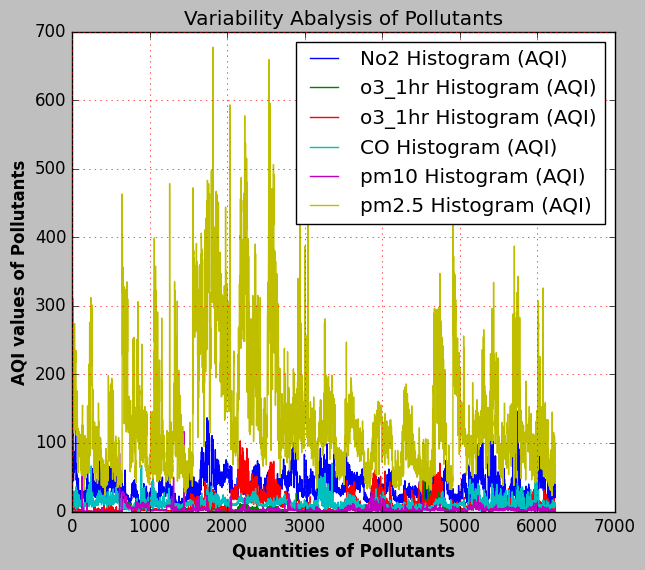

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.plot(aqi_no2, label="No2 Histogram (AQI)")
plt.plot(aqi_o3_1hr, label="o3_1hr Histogram (AQI)")
plt.plot(aqi_o3_4hr, label="o3_1hr Histogram (AQI)")
plt.plot(aqi_co, label="CO Histogram (AQI)")
plt.plot(aqi_pm10, label="pm10 Histogram (AQI)")
plt.plot(aqi_pm25, label="pm2.5 Histogram (AQI)")
plt.xlabel("Quantities of Pollutants", weight="bold")
plt.ylabel("AQI values of Pollutants", weight="bold")
plt.title("Variability Abalysis of Pollutants")
plt.legend()
plt.grid(color="red")
mpl.rcParams.update({'font.size':14})
plt.savefig('Variability Abalysis of Pollutants.jpg')

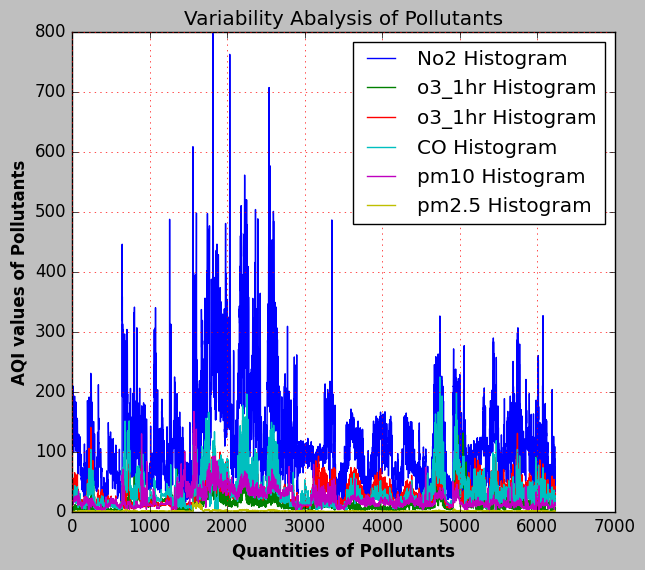

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.plot(no2, label="No2 Histogram")
plt.plot(o3_1hr, label="o3_1hr Histogram")
plt.plot(o3_4hr, label="o3_1hr Histogram")
plt.plot(co, label="CO Histogram")
plt.plot(pm10, label="pm10 Histogram")
plt.plot(pm25, label="pm2.5 Histogram")
plt.xlabel("Quantities of Pollutants", weight="bold")
plt.ylabel("AQI values of Pollutants", weight="bold")
plt.title("Variability Abalysis of Pollutants")
plt.legend()
plt.grid(color="red")
mpl.rcParams.update({'font.size':14})
plt.savefig('pm10_data_visualization.jpg')

In [ ]:
no2_train,no2_test, aqi_no2_train, aqi_no2_test = train_test_split(no2, aqi_no2, test_size=1/3)




In [ ]:
print("no of training data", len(no2_train))
print("no of testing data", len(no2_test))
print("no of AQI training data", len(aqi_no2_train))
print("no of AQI testing data", len(aqi_no2_test))

no of training data 4157
no of testing data 2079
no of AQI training data 4157
no of AQI testing data 2079


In [ ]:
no2_lr = LinearRegression()

In [ ]:
no2_lr.fit(no2_train, aqi_no2_train)

LinearRegression()

In [ ]:
no2_lr.score(no2_train, aqi_no2_train) #Training Accuracy

0.09647514108497746

In [ ]:
no2_lr.score(no2_test, aqi_no2_test) #Testing Accuracy

0.08713925403987799

In [ ]:
no2_lr.score(data_new.iloc[:,3:4], data_new.iloc[:, 10:11]) #raw data accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.0935897713475885

In [ ]:
no2_lr.score(no2, aqi_no2) #overall processed data

0.0935897713475885

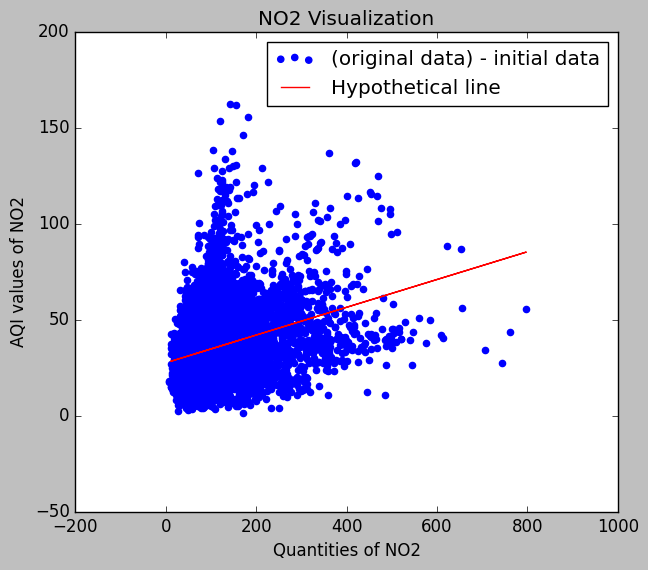

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(no2, aqi_no2, label="(original data) - initial data", color="blue")
plt.plot(no2_test, no2_lr.predict(no2_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of NO2")
plt.ylabel("AQI values of NO2")
plt.title("NO2 Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('No2_Prediction_visualization.jpg')


In [ ]:
co_train, co_test, aqi_co_train, aqi_co_test = train_test_split(co, aqi_co, test_size=1/3, random_state=101)

co_lr = LinearRegression()


print("no of training data", len(co_train))
print("no of testing data", len(co_test))
print("no of AQI training data", len(aqi_co_train))
print("no of AQI testing data", len(aqi_co_test))



no of training data 4157
no of testing data 2079
no of AQI training data 4157
no of AQI testing data 2079


In [ ]:
co_lr.fit(co_train, aqi_co_train)


LinearRegression()

In [ ]:
co_lr.score(co_train, aqi_co_train)     #Training Accuracy

0.03149161444711912

In [ ]:
co_lr.score(co_test, aqi_co_test)

0.046188531905574925

In [ ]:
co_lr.score(data_new.iloc[:,6:7], data_new.iloc[:, 9:10])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.03664038228471844

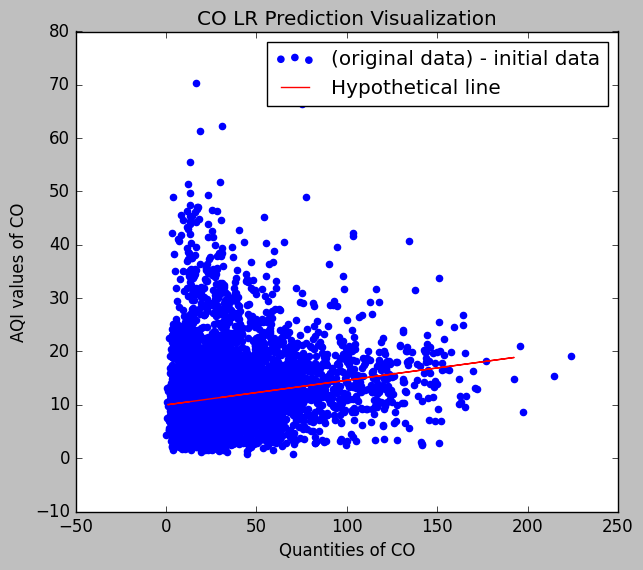

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(co, aqi_co, label="(original data) - initial data", color="blue")
plt.plot(co_test, co_lr.predict(co_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of CO")
plt.ylabel("AQI values of CO")
plt.title("CO LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('CO_Prediction_visualization.jpg')

In [ ]:
o3_1hr_train,o3_1hr_test, aqi_o3_1hr_train, aqi_o3_1hr_test = train_test_split(o3_1hr, aqi_o3_1hr, test_size=1/3, random_state=100)
o3_4hr_train,o3_4hr_test, aqi_o3_4hr_train, aqi_o3_4hr_test = train_test_split(o3_4hr, aqi_o3_4hr, test_size=1/3, random_state=100)
pm10_train,pm10_test, aqi_pm10_train, aqi_pm10_test = train_test_split(pm10, aqi_pm10, test_size=1/3, random_state=100)
pm25_train,pm25_test, aqi_pm25_train, aqi_pm25_test = train_test_split(pm25, aqi_pm25, test_size=1/3, random_state=100)

In [ ]:
o3_lhr_lr = LinearRegression()
o3_4hr_lr = LinearRegression()
pm10_lr = LinearRegression()
pm25_lr = LinearRegression()


print("no of training data", len(o3_1hr_train))
print("no of testing data", len(o3_1hr_test))
print("no of AQI training data", len(aqi_o3_1hr_train))
print("no of AQI testing data", len(aqi_o3_1hr_test))

no of training data 4157
no of testing data 2079
no of AQI training data 4157
no of AQI testing data 2079


In [ ]:
o3_lhr_lr.fit(o3_1hr_train, aqi_o3_1hr_train)
o3_4hr_lr.fit(o3_4hr_train, aqi_o3_4hr_train)
pm10_lr.fit(pm10_train, aqi_pm10_train)
pm25_lr.fit(pm25_train, aqi_pm25_train)


LinearRegression()

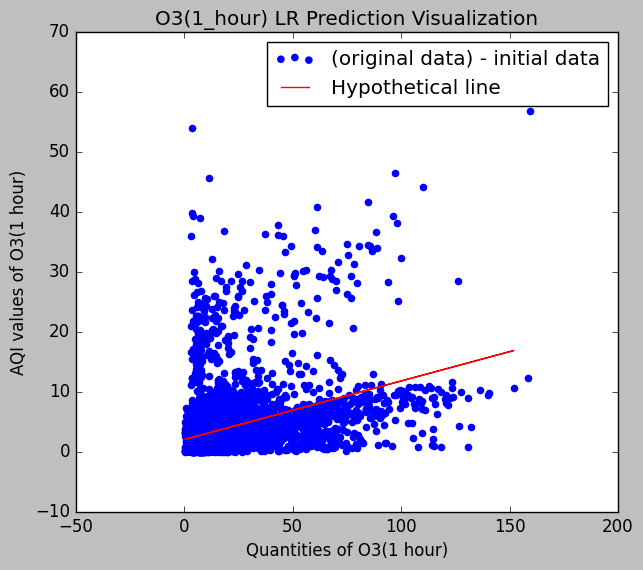

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(o3_1hr, aqi_o3_1hr, label="(original data) - initial data", color="blue")
plt.plot(o3_1hr_test, o3_lhr_lr.predict(o3_1hr_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of O3(1 hour)")
plt.ylabel("AQI values of O3(1 hour)")
plt.title("O3(1_hour) LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('O3_1hr_Prediction_visualization.jpg')

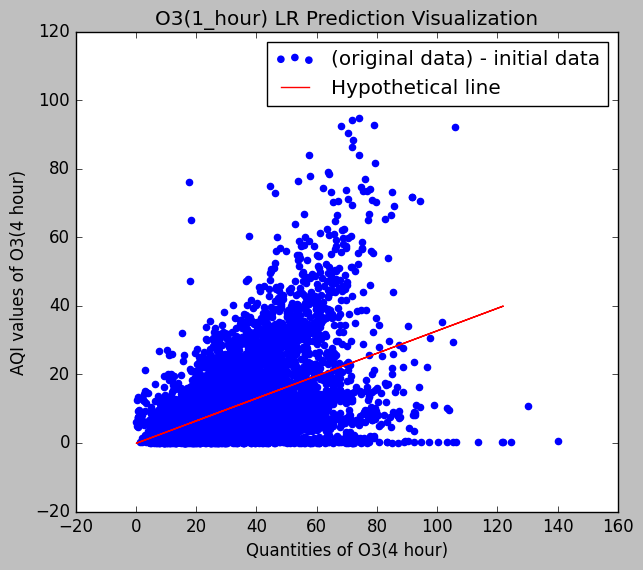

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(o3_4hr, aqi_o3_4hr, label="(original data) - initial data", color="blue")
plt.plot(o3_4hr_test, o3_4hr_lr.predict(o3_4hr_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of O3(4 hour)")
plt.ylabel("AQI values of O3(4 hour)")
plt.title("O3(1_hour) LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('O3_4hr_Prediction_visualization.jpg')

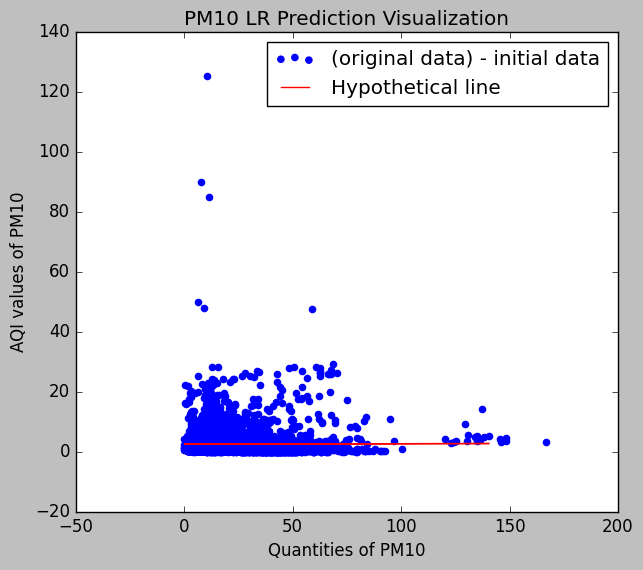

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm10, aqi_pm10, label="(original data) - initial data", color="blue")
plt.plot(pm10_test, pm10_lr.predict(pm10_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of PM10")
plt.ylabel("AQI values of PM10")
plt.title("PM10 LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('pm10_Prediction_visualization.jpg')

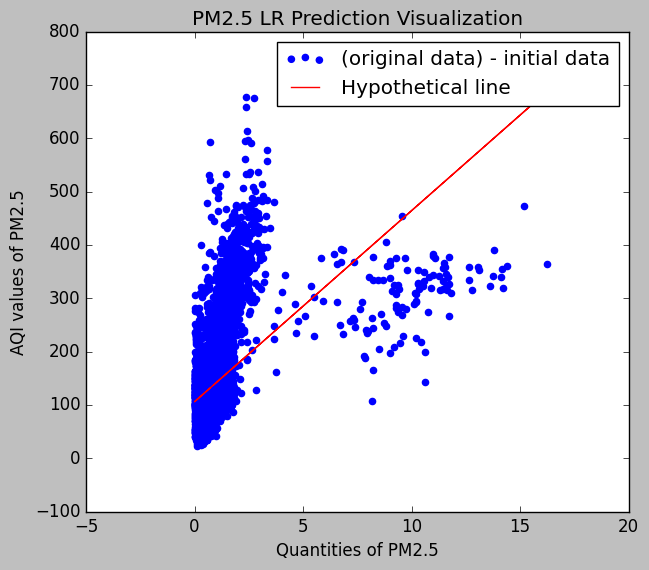

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(pm25, aqi_pm25, label="(original data) - initial data", color="blue")
plt.plot(pm25_test, pm25_lr.predict(pm25_test), color="red", label="Hypothetical line")
plt.xlabel("Quantities of PM2.5")
plt.ylabel("AQI values of PM2.5")
plt.title("PM2.5 LR Prediction Visualization")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('pm2_5_Prediction_visualization.jpg')

In [ ]:
Weights = [no2_lr.coef_ , co_lr.coef_ , pm25_lr.coef_ , pm10_lr.coef_ , o3_lhr_lr.coef_ , o3_4hr_lr.coef_]
Weights_name = ["NO2" , "CO" , "PM 2.5" , "PM 10" , "O3 (1hrs)" , "O3 (4hrs)"]

In [ ]:
Weights

[array([[0.07234489]]),
 array([[0.04619073]]),
 array([[35.82124824]]),
 array([[0.00149983]]),
 array([[0.09778928]]),
 array([[0.32855347]])]

In [ ]:

AQI_Parameter = [Weights_name , Weights]

In [ ]:
AQI_Parameter

[['NO2', 'CO', 'PM 2.5', 'PM 10', 'O3 (1hrs)', 'O3 (4hrs)'],
 [array([[0.07234489]]),
  array([[0.04619073]]),
  array([[35.82124824]]),
  array([[0.00149983]]),
  array([[0.09778928]]),
  array([[0.32855347]])]]

In [ ]:
#AQI is summation of all pollutants

no2_pred = no2_lr.predict(no2_test)
pm10_pred = pm10_lr.predict(pm10_test)
pm25_pred = pm25_lr.predict(pm25_test)
co_pred = co_lr.predict(co_test)
o3_1hr_pred = o3_lhr_lr.predict(o3_1hr_test)
o3_4hr_pred = o3_4hr_lr.predict(o3_4hr_test)

In [ ]:
print(no2_pred)


[[32.21292107]
 [49.26678132]
 [46.69709092]
 ...
 [38.17124598]
 [32.94143409]
 [39.6000575 ]]


In [ ]:
print(pm10_pred)


[[2.45403497]
 [2.45832449]
 [2.47641249]
 ...
 [2.46862835]
 [2.47293288]
 [2.47836228]]


In [ ]:
print(pm25_pred)


[[131.56185789]
 [124.75582072]
 [163.8009813 ]
 ...
 [131.92007037]
 [138.36789505]
 [137.29325761]]


In [ ]:
print(o3_1hr_pred)


[[4.92474541]
 [2.16122047]
 [3.58209865]
 ...
 [2.93277786]
 [3.50484512]
 [3.277974  ]]


In [ ]:
print(o3_4hr_pred)


[[ 5.80325628]
 [ 6.52278837]
 [19.86863026]
 ...
 [17.03321383]
 [ 3.51980967]
 [15.80442386]]


In [ ]:
df = pd.read_csv('city_day.csv')

# Define AQI classification based on NO2 levels
def classify_no2_aqi(no2):
    if pd.isna(no2):
        return 'Unknown'
    elif no2 <= 40:
        return 'Green'
    elif 41 <= no2 <= 80:
        return 'Amber'
    else:
        return 'Red'

# Apply classification and assign to aqi_no2_pred
aqi_no2_pred = df['NO2'].apply(classify_no2_aqi)

# Now this will work
print(aqi_no2_pred)


0        Green
1        Green
2        Green
3        Green
4        Green
         ...  
29526    Green
29527    Green
29528    Green
29529    Green
29530    Green
Name: NO2, Length: 29531, dtype: object


In [ ]:
def classify_co_aqi(co):
    if pd.isna(co):
        return 'Unknown'
    elif co <= 1.0:
        return 'Green'
    elif 1.1 <= co <= 2.0:
        return 'Amber'
    else:
        return 'Red'

# Apply classification
aqi_co_pred = df['CO'].apply(classify_co_aqi)

# Print first few predictions
print(aqi_co_pred.head(10))


0      Green
1      Green
2        Red
3      Amber
4        Red
5        Red
6        Red
7        Red
8        Red
9    Unknown
Name: CO, dtype: object


0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
5    Unknown
6    Unknown
7    Unknown
8    Unknown
9    Unknown
Name: PM10_AQI_Label, dtype: object


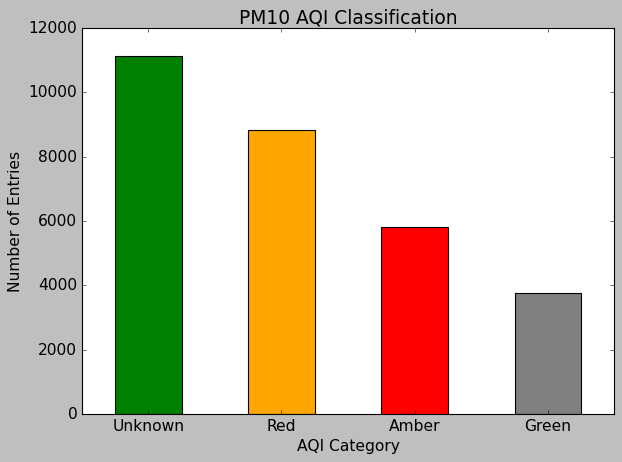

In [ ]:
def classify_pm10_aqi(pm10):
    if pd.isna(pm10):
        return 'Unknown'
    elif pm10 <= 50:
        return 'Green'
    elif 51 <= pm10 <= 100:
        return 'Amber'
    else:
        return 'Red'

# Apply classifier
df['PM10_AQI_Label'] = df['PM10'].apply(classify_pm10_aqi)

# Print first 10 predictions
print(df['PM10_AQI_Label'].head(10))

# Plot label distribution
label_counts = df['PM10_AQI_Label'].value_counts()
label_counts.plot(kind='bar', color=['green', 'orange', 'red', 'gray'])
plt.title('PM10 AQI Classification')
plt.xlabel('AQI Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:

# Define PM2.5-based AQI classification
def classify_pm25_aqi(pm25):
    if pd.isna(pm25):
        return 'Unknown'
    elif pm25 <= 30:
        return 'Green'
    elif 31 <= pm25 <= 60:
        return 'Amber'
    else:
        return 'Red'


aqi_pm25_pred = df['PM2.5'].apply(classify_pm25_aqi)


print(aqi_pm25_pred.head(10))


0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
5    Unknown
6    Unknown
7    Unknown
8    Unknown
9    Unknown
Name: PM2.5, dtype: object


In [ ]:
# Define O3 (1-hour average) AQI classification
def classify_o3_1hr(o3):
    if pd.isna(o3):
        return 'Unknown'
    elif o3 <= 50:
        return 'Green'
    elif 51 <= o3 <= 100:
        return 'Amber'
    else:
        return 'Red'


aqi_o3_1hr_pred = df['O3'].apply(classify_o3_1hr)

print(aqi_o3_1hr_pred.head(10))


0      Red
1    Green
2    Green
3    Green
4    Green
5    Green
6    Green
7    Green
8    Green
9    Green
Name: O3, dtype: object


In [ ]:
# Define O3 (4-hour average) AQI classification
def classify_o3_4hr(o3):
    if pd.isna(o3):
        return 'Unknown'
    elif o3 <= 100:
        return 'Green'
    elif 101 <= o3 <= 168:
        return 'Amber'
    else:
        return 'Red'


aqi_o3_4hr_pred = df['O3'].apply(classify_o3_4hr)


print(aqi_o3_4hr_pred.head(10))


0    Amber
1    Green
2    Green
3    Green
4    Green
5    Green
6    Green
7    Green
8    Green
9    Green
Name: O3, dtype: object


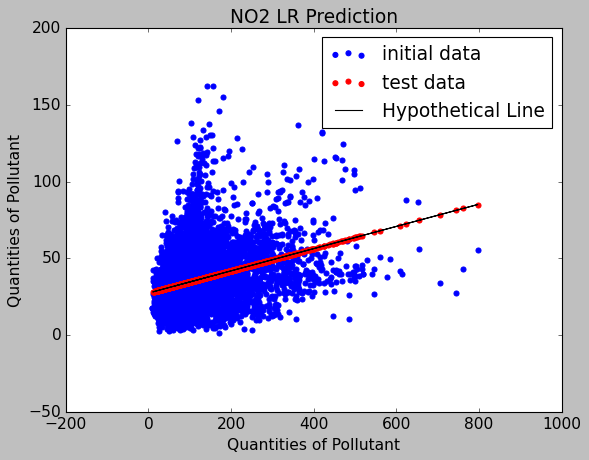

In [ ]:
plt.scatter(no2, aqi_no2, label="initial data", color="blue")

plt.scatter(no2_test, no2_pred, label="test data", color="red")
plt.plot(no2_test, no2_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant")
plt.ylabel("Quantities of Pollutant")
plt.title("NO2 LR Prediction")
plt.legend()




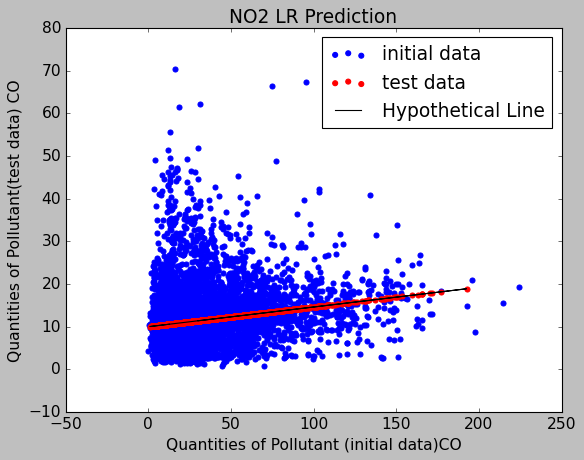

In [ ]:
plt.scatter(co, aqi_co, label="initial data", color="blue")

plt.scatter(co_test, co_pred, label="test data", color="red")
plt.plot(co_test, co_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data)CO")
plt.ylabel("Quantities of Pollutant(test data) CO")
plt.title("NO2 LR Prediction")
plt.legend()

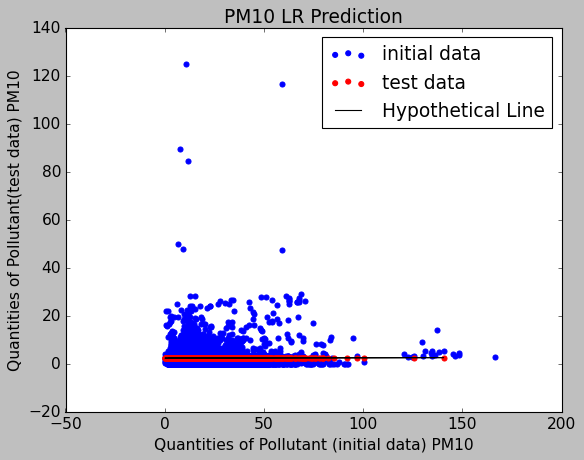

In [ ]:
plt.scatter(pm10, aqi_pm10, label="initial data", color="blue")
plt.scatter(pm10_test, pm10_pred, label="test data", color="red")
plt.plot(pm10_test, pm10_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data) PM10")
plt.ylabel("Quantities of Pollutant(test data) PM10")
plt.title("PM10 LR Prediction")
plt.legend()

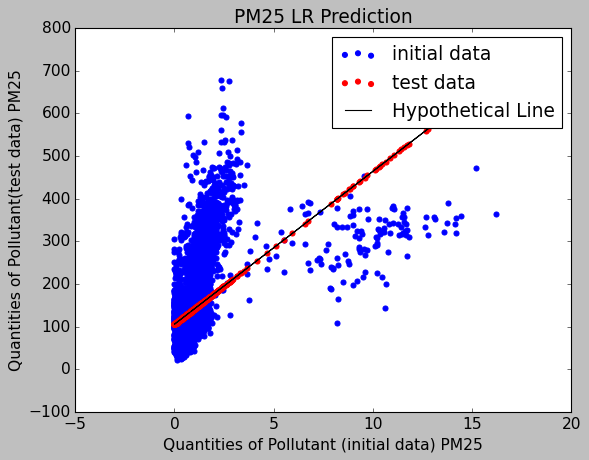

In [ ]:
plt.scatter(pm25, aqi_pm25, label="initial data", color="blue")
plt.scatter(pm25_test, pm25_pred, label="test data", color="red")
plt.plot(pm25_test, pm25_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data) PM25")
plt.ylabel("Quantities of Pollutant(test data) PM25")
plt.title("PM25 LR Prediction")
plt.legend()

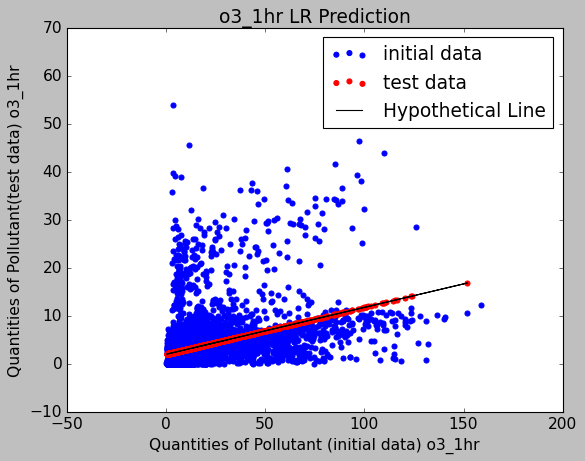

In [ ]:
plt.scatter(o3_1hr, aqi_o3_1hr, label="initial data", color="blue")
plt.scatter(o3_1hr_test, o3_1hr_pred, label="test data", color="red")
plt.plot(o3_1hr_test, o3_1hr_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data) o3_1hr")
plt.ylabel("Quantities of Pollutant(test data) o3_1hr")
plt.title("o3_1hr LR Prediction")
plt.legend()

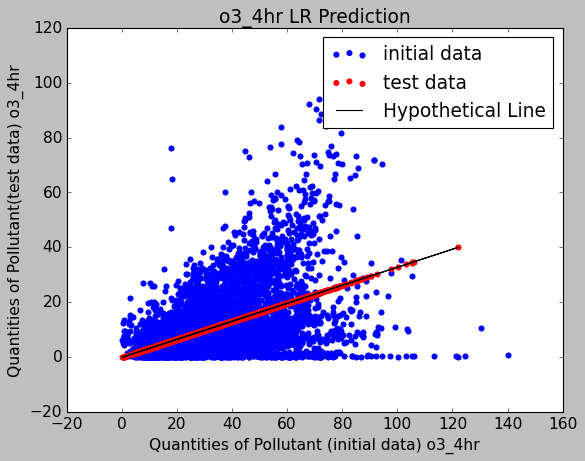

In [ ]:
plt.scatter(o3_4hr, aqi_o3_4hr, label="initial data", color="blue")
plt.scatter(o3_4hr_test, o3_4hr_pred, label="test data", color="red")
plt.plot(o3_4hr_test, o3_4hr_pred, label="Hypothetical Line", color="black")
plt.xlabel("Quantities of Pollutant (initial data) o3_4hr")
plt.ylabel("Quantities of Pollutant(test data) o3_4hr")
plt.title("o3_4hr LR Prediction")
plt.legend()

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(no2_test, no2_pred), "%")


87.41841852631676 %


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(co_test, co_pred), "%")

21.771880039818228 %


In [ ]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(no2_test, no2_pred)
mape

87.41841852631676

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(pm25_test, pm25_pred), "%")

140.80217530221344 %


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(o3_1hr_test, o3_1hr_pred), "%")

13.62024215501228 %


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(o3_4hr_test, o3_4hr_pred), "%")

21.517932746457156 %


In [ ]:
print(metrics.mean_squared_error(o3_4hr_test, o3_4hr_pred), "%")

622.8337505147488 %
